# Pre-processing Soil Properties Data

### Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import figure

%matplotlib inline

### Import data as pandas DataFrame:
data had to first be converted from .rds to .csv in R studio because of an encoding error. The following dataframe reads
the data from a CSV.

In [2]:
import pylab as p

cols = ['site_key',
        'longitude_decimal_degrees',
        'latitude_decimal_degrees',
        'clay_tot_psa',
        'silt_tot_psa',
        'sand_tot_psa',
        'oc',
        'oc_d',
        'c_tot',
        'n_tot',
        'ph_kcl',
        'ph_h2o',
        'ph_cacl2',
        'cec_sum',
        'cec_nh4',
        'ecec',
        'wpg2',
        'db_od',
        'ca_ext',
        'mg_ext',
        'na_ext',
        'k_ext',
        'ec_satp',
        'ec_12pre']

df = pd.read_csv('./data/unprocessed/soil_properties/soil_data.csv', usecols=cols)

C:\Users\liams\anaconda3\envs\soil-dataset-exploration\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Column Name Key:
* clay_tot_psa: Clay, Total in % wt for <2 mm soil fraction
* silt_tot_psa: Silt, Total in % wt for <2 mm soil fraction
* sand_tot_psa: Sand, Total in % wt for <2 mm soil fraction
* oc: Carbon, Organic in g/kg for <2 mm soil fraction
* oc_d: Soil organic carbon density in kg/m3
* c_tot: Carbon, Total in g/kg for <2 mm soil fraction
* n_tot: Nitrogen, Total NCS in g/kg for <2 mm soil fraction
* ph_kcl: pH, KCl Suspension for <2 mm soil fraction
* ph_h2o: pH, 1:1 Soil-Water Suspension for <2 mm soil fraction
* ph_cacl2: pH, CaCl2 Suspension for <2 mm soil fraction
* cec_sum: Cation Exchange Capacity, Summary, in cmol(+)/kg for <2 mm soil fraction
* cec_nh4: Cation Exchange Capacity, NH4 prep, in cmol(+)/kg for <2 mm soil fraction
* ecec: Cation Exchange Capacity, Effective, CMS derived value default, standa prep in cmol(+)/kg for <2 mm soil fraction
* wpg2: Coarse fragments in % wt for >2 mm soil fraction
* db_od: Bulk density (Oven Dry) in g/cm3 (4A1h)
* ca_ext: Calcium, Extractable in mg/kg for <2 mm soil fraction (usually Mehlich3)
* mg_ext: Magnesium, Extractable in mg/kg for <2 mm soil fraction (usually Mehlich3)
* na_ext: Sodium, Extractable in mg/kg for <2 mm soil fraction (usually Mehlich3)
* k_ext: Potassium, Extractable in mg/kg for <2 mm soil fraction (usually Mehlich3)
* ec_satp: Electrical Conductivity, Saturation Extract in dS/m for <2 mm soil fraction
* ec_12pre: Electrical Conductivity, Predict, 1:2 (w/w) in dS/m for <2 mm soil fraction

In [3]:
df

site_key  longitude_decimal_degrees  latitude_decimal_degrees  \
0       icr006475                  36.435982                 -6.088750   
1       icr006586                  36.457722                 -6.055750   
2       icr007929                  37.493351                 -5.339337   
3       icr008008                  37.515327                 -5.333700   
4       icr010198                  35.191799                -11.087100   
...           ...                        ...                       ...   
634959     ZW0067                  31.750000                -19.800000   
634960     ZW0067                  31.750000                -19.800000   
634961     ZW0067                  31.750000                -19.800000   
634962     ZW0067                  31.750000                -19.800000   
634963     ZW0067                  31.750000                -19.800000   

        clay_tot_psa  silt_tot_psa  sand_tot_psa   oc  oc_d  c_tot  n_tot  \
0                NaN           NaN           NaN  NaN   NaN    NaN    NaN   
1                NaN           NaN           NaN  NaN   NaN    NaN    NaN   
2                NaN           NaN           NaN  NaN   NaN    NaN    NaN   
3                NaN           NaN           NaN  NaN   NaN    NaN    NaN   
4                NaN           NaN           NaN  NaN   NaN    NaN    NaN   
...              ...           ...           ...  ...   ...    ...    ...   
634959           7.0          11.0          82.0  1.4   NaN    NaN    0.1   
634960           7.0          29.0          64.0  1.2   NaN    NaN    0.1   
634961          13.0          10.0          77.0  0.5   NaN    NaN    0.3   
634962          27.0          69.0           4.0  NaN   NaN    NaN    NaN   
634963          15.0          15.0          70.0  0.6   NaN    NaN    0.1   

        ...  cec_nh4  ecec  wpg2  db_od  ca_ext  mg_ext  na_ext    k_ext  \
0       ...      NaN   NaN   NaN    NaN     NaN    89.5   42.71   306.30   
1       ...      NaN   NaN   NaN    NaN     NaN   636.7   40.83  1186.00   
2       ...      NaN   NaN   NaN    NaN     NaN   428.5   42.94    72.57   
3       ...      NaN   NaN   NaN    NaN     NaN   222.5   20.73   274.60   
4       ...      NaN   NaN   NaN    NaN     NaN    76.5   49.31    91.76   
...     ...      ...   ...   ...    ...     ...     ...     ...      ...   
634959  ...      NaN   NaN   NaN    NaN    40.0    36.3   46.00    39.10   
634960  ...      NaN   NaN   NaN    NaN     NaN    36.3   46.00    39.10   
634961  ...      NaN   NaN   NaN    NaN     NaN    36.3   46.00    39.10   
634962  ...      NaN   NaN   NaN   0.64     NaN     NaN     NaN      NaN   
634963  ...      NaN   NaN   NaN    NaN    40.0    36.3   92.00    39.10   

        ec_satp  ec_12pre  
0         0.053       NaN  
1         0.193       NaN  
2         0.305       NaN  
3         0.053       NaN  
4         0.032       NaN  
...         ...       ...  
634959    0.100       NaN  
634960    0.100       NaN  
634961    0.100       NaN  
634962      NaN       NaN  
634963    0.100       NaN  

[634964 rows x 24 columns]

### filling na, and removing all data that is not contained within washington

In [4]:
df = df[(df['latitude_decimal_degrees'] >= 45) &
        (df['latitude_decimal_degrees'] <= 49) &
        (df['longitude_decimal_degrees'] >= -125) &
        (df['longitude_decimal_degrees'] <= -116)]
df

site_key  longitude_decimal_degrees  latitude_decimal_degrees  \
115684      687                 -123.73000                  48.63000   
115685      687                 -123.73000                  48.63000   
115686      687                 -123.73000                  48.63000   
115687      687                 -123.73000                  48.63000   
115692      689                 -123.52000                  48.83000   
...         ...                        ...                       ...   
631448   US0366                 -123.09861                  45.53472   
631449   US0366                 -123.09861                  45.53472   
631450   US0366                 -123.09861                  45.53472   
631451   US0366                 -123.09861                  45.53472   
631452   US0366                 -123.09861                  45.53472   

        clay_tot_psa  silt_tot_psa  sand_tot_psa     oc   oc_d  c_tot  n_tot  \
115684           NaN           NaN           NaN  432.8  69.20    NaN   12.9   
115685           NaN           NaN           NaN   29.6  36.70    NaN    NaN   
115686           NaN           NaN           NaN   30.0  16.10    NaN    NaN   
115687           NaN           NaN           NaN   11.0   8.29    NaN    NaN   
115692           NaN           NaN           NaN  422.6  67.60    NaN   10.1   
...              ...           ...           ...    ...    ...    ...    ...   
631448          21.0          72.0           7.0   13.5  19.20    NaN    NaN   
631449          22.0          72.0           6.0    4.1   5.99    NaN    NaN   
631450          22.0          71.0           7.0    1.9   3.02    NaN    NaN   
631451          22.0          72.0           6.0    1.7   2.33    NaN    NaN   
631452          24.0          69.0           7.0    0.9   1.30    NaN    NaN   

        ...  cec_nh4  ecec  wpg2  db_od  ca_ext  mg_ext  na_ext    k_ext  \
115684  ...      NaN   NaN   0.0   0.16  8946.0  897.82    48.3   969.68   
115685  ...      NaN   NaN   0.0   1.24   736.0   76.23    11.5    78.20   
115686  ...      NaN   NaN  48.0   1.03   328.0   35.09    11.5    62.56   
115687  ...      NaN   NaN  48.0   1.45     NaN     NaN     NaN      NaN   
115692  ...      NaN   NaN   0.0   0.16  7282.0  949.85    48.3  1126.08   
...     ...      ...   ...   ...    ...     ...     ...     ...      ...   
631448  ...      NaN   NaN   NaN   1.42  1620.0  206.00    46.0   430.00   
631449  ...      NaN   NaN   NaN   1.46   920.0  133.00    46.0   274.00   
631450  ...      NaN   NaN   NaN   1.59  1620.0  254.00    46.0   196.00   
631451  ...      NaN   NaN   NaN   1.37  2620.0  460.00    46.0   196.00   
631452  ...      NaN   NaN   NaN   1.44  3220.0  544.00    92.0   196.00   

        ec_satp  ec_12pre  
115684      NaN       NaN  
115685      NaN       NaN  
115686      NaN       NaN  
115687      NaN       NaN  
115692      NaN       NaN  
...         ...       ...  
631448      0.1       NaN  
631449      0.1       NaN  
631450      0.1       NaN  
631451      0.1       NaN  
631452      0.1       NaN  

[11076 rows x 24 columns]

# TODO:
1. normalize data
2. create class variables

### average data taken from the same site

In [5]:
sites = df['site_key'].unique()
averaged_df = pd.DataFrame(columns=cols)

for index in range(len(sites)):
    site = sites[index]
    site_df = df[df['site_key'] == site]
    lat = site_df['latitude_decimal_degrees'].unique()[0]
    lon = site_df['longitude_decimal_degrees'].unique()[0]
    site_data_df = site_df.drop(['site_key', 'longitude_decimal_degrees', 'latitude_decimal_degrees'], axis=1)
    average_site_data_series = site_data_df.mean()
    average_site_data_series['site_key'] = site
    average_site_data_series['longitude_decimal_degrees'] = lon
    average_site_data_series['latitude_decimal_degrees'] = lat
    averaged_df = averaged_df.append(average_site_data_series, ignore_index=True)
averaged_df

site_key  longitude_decimal_degrees  latitude_decimal_degrees  \
0         687                 -123.73000                  48.63000   
1         689                 -123.52000                  48.83000   
2        1122                 -123.37000                  48.48000   
3        1123                 -124.45000                  48.60000   
4        2367                 -123.36000                  48.88000   
...       ...                        ...                       ...   
1901   US0241                 -118.55000                  48.38333   
1902   US0242                 -118.96667                  48.33333   
1903   US0257                 -123.44722                  45.91389   
1904   US0284                 -117.55417                  46.95389   
1905   US0366                 -123.09861                  45.53472   

      clay_tot_psa  silt_tot_psa  sand_tot_psa          oc       oc_d  c_tot  \
0              NaN           NaN           NaN  125.850000  32.572500    NaN   
1              NaN           NaN           NaN  124.975000  35.565000    NaN   
2         7.166667     30.500000     62.333333   65.142857  33.768571    NaN   
3         8.200000     36.000000     55.800000  146.533333  66.251667    NaN   
4        10.500000     36.000000     53.500000   13.000000  15.210000    NaN   
...            ...           ...           ...         ...        ...    ...   
1901      2.500000     55.000000     42.500000   12.850000  11.305000    NaN   
1902      2.500000     38.500000     59.000000   12.066667  11.078200    NaN   
1903     22.200000     59.400000     18.400000   18.400000  17.853333    NaN   
1904     17.222222     76.555556      6.222222    9.744444  12.102222    NaN   
1905     20.857143     72.000000      7.142857   14.685714   6.368000    NaN   

          n_tot  ...  cec_nh4  ecec       wpg2     db_od       ca_ext  \
0     12.900000  ...      NaN   NaN  24.000000  0.970000  3336.666667   
1     10.100000  ...      NaN   NaN  15.000000  1.032500  3092.666667   
2      5.142857  ...      NaN   NaN   4.285714  1.108571  2144.571429   
3      3.983333  ...      NaN   NaN   4.166667  1.055000   788.666667   
4      0.800000  ...      NaN   NaN   3.750000  1.386667  1210.000000   
...         ...  ...      ...   ...        ...       ...          ...   
1901   0.700000  ...      NaN   NaN  10.000000  0.920000   860.000000   
1902   1.300000  ...      NaN   NaN  18.800000  1.210000   823.333333   
1903   2.050000  ...      NaN   NaN  11.000000  1.356667   740.000000   
1904   0.925000  ...      NaN   NaN        NaN  1.334444  4126.666667   
1905        NaN  ...      NaN   NaN        NaN  1.456000  2562.857143   

          mg_ext     na_ext       k_ext  ec_satp  ec_12pre  
0     336.380000  23.766667  370.146667      NaN       NaN  
1     383.570000  24.533333  458.773333      NaN       NaN  
2     386.681429  66.371429  524.498571      NaN       NaN  
3     270.233333  43.700000  303.025000      NaN       NaN  
4     189.566667  38.333333   97.750000      NaN       NaN  
...          ...        ...         ...      ...       ...  
1901   78.650000  23.000000  215.500000      0.1       NaN  
1902   64.533333  61.333333  117.240000      0.1       NaN  
1903  241.940000        NaN  273.800000      0.1       NaN  
1904  524.111111  27.600000  260.622222      0.1       NaN  
1905  318.000000  49.285714  296.285714      0.1       NaN  

[1906 rows x 24 columns]

In [6]:
data = averaged_df.fillna(0)
data = data.drop(['site_key', 'longitude_decimal_degrees', 'latitude_decimal_degrees'], axis=1)
data

clay_tot_psa  silt_tot_psa  sand_tot_psa          oc       oc_d  c_tot  \
0         0.000000      0.000000      0.000000  125.850000  32.572500    0.0   
1         0.000000      0.000000      0.000000  124.975000  35.565000    0.0   
2         7.166667     30.500000     62.333333   65.142857  33.768571    0.0   
3         8.200000     36.000000     55.800000  146.533333  66.251667    0.0   
4        10.500000     36.000000     53.500000   13.000000  15.210000    0.0   
...            ...           ...           ...         ...        ...    ...   
1901      2.500000     55.000000     42.500000   12.850000  11.305000    0.0   
1902      2.500000     38.500000     59.000000   12.066667  11.078200    0.0   
1903     22.200000     59.400000     18.400000   18.400000  17.853333    0.0   
1904     17.222222     76.555556      6.222222    9.744444  12.102222    0.0   
1905     20.857143     72.000000      7.142857   14.685714   6.368000    0.0   

          n_tot  ph_kcl    ph_h2o  ph_cacl2  ...  cec_nh4  ecec       wpg2  \
0     12.900000     0.0  0.000000  5.033333  ...      0.0   0.0  24.000000   
1     10.100000     0.0  0.000000  4.966667  ...      0.0   0.0  15.000000   
2      5.142857     0.0  0.000000  4.614286  ...      0.0   0.0   4.285714   
3      3.983333     0.0  0.000000  4.483333  ...      0.0   0.0   4.166667   
4      0.800000     0.0  0.000000  5.033333  ...      0.0   0.0   3.750000   
...         ...     ...       ...       ...  ...      ...   ...        ...   
1901   0.700000     0.0  6.500000  5.600000  ...      0.0   0.0  10.000000   
1902   1.300000     0.0  6.183333  5.466667  ...      0.0   0.0  18.800000   
1903   2.050000     0.0  5.320000  4.700000  ...      0.0   0.0  11.000000   
1904   0.925000     0.0  6.944444  6.344444  ...      0.0   0.0   0.000000   
1905   0.000000     0.0  5.814286  5.185714  ...      0.0   0.0   0.000000   

         db_od       ca_ext      mg_ext     na_ext       k_ext  ec_satp  \
0     0.970000  3336.666667  336.380000  23.766667  370.146667      0.0   
1     1.032500  3092.666667  383.570000  24.533333  458.773333      0.0   
2     1.108571  2144.571429  386.681429  66.371429  524.498571      0.0   
3     1.055000   788.666667  270.233333  43.700000  303.025000      0.0   
4     1.386667  1210.000000  189.566667  38.333333   97.750000      0.0   
...        ...          ...         ...        ...         ...      ...   
1901  0.920000   860.000000   78.650000  23.000000  215.500000      0.1   
1902  1.210000   823.333333   64.533333  61.333333  117.240000      0.1   
1903  1.356667   740.000000  241.940000   0.000000  273.800000      0.1   
1904  1.334444  4126.666667  524.111111  27.600000  260.622222      0.1   
1905  1.456000  2562.857143  318.000000  49.285714  296.285714      0.1   

      ec_12pre  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
1901       0.0  
1902       0.0  
1903       0.0  
1904       0.0  
1905       0.0  

[1906 rows x 21 columns]

### Scale the data

In [7]:
for column in data.columns:
    data[column] = data[column] / data[column].abs().max()
data

clay_tot_psa  silt_tot_psa  sand_tot_psa        oc      oc_d  c_tot  \
0         0.000000      0.000000      0.000000  0.197815  0.038740    0.0   
1         0.000000      0.000000      0.000000  0.196440  0.042299    0.0   
2         0.106965      0.359670      0.631383  0.102394  0.040162    0.0   
3         0.122388      0.424528      0.565206  0.230326  0.078796    0.0   
4         0.156716      0.424528      0.541909  0.020434  0.018090    0.0   
...            ...           ...           ...       ...       ...    ...   
1901      0.037313      0.648585      0.430489  0.020198  0.013446    0.0   
1902      0.037313      0.454009      0.597620  0.018967  0.013176    0.0   
1903      0.331343      0.700472      0.186376  0.028922  0.021234    0.0   
1904      0.257048      0.902778      0.063026  0.015317  0.014394    0.0   
1905      0.311301      0.849057      0.072351  0.023083  0.007574    0.0   

         n_tot  ph_kcl    ph_h2o  ph_cacl2  ...  cec_nh4  ecec      wpg2  \
0     0.543960     0.0  0.000000  0.536603  ...      0.0   0.0  0.250498   
1     0.425891     0.0  0.000000  0.529495  ...      0.0   0.0  0.156561   
2     0.216861     0.0  0.000000  0.491928  ...      0.0   0.0  0.044732   
3     0.167967     0.0  0.000000  0.477967  ...      0.0   0.0  0.043489   
4     0.033734     0.0  0.000000  0.536603  ...      0.0   0.0  0.039140   
...        ...     ...       ...       ...  ...      ...   ...       ...   
1901  0.029517     0.0  0.661914  0.597015  ...      0.0   0.0  0.104374   
1902  0.054818     0.0  0.629667  0.582800  ...      0.0   0.0  0.196224   
1903  0.086443     0.0  0.541752  0.501066  ...      0.0   0.0  0.114812   
1904  0.039005     0.0  0.707174  0.676380  ...      0.0   0.0  0.000000   
1905  0.000000     0.0  0.592086  0.552848  ...      0.0   0.0  0.000000   

         db_od    ca_ext    mg_ext    na_ext     k_ext  ec_satp  ec_12pre  
0     0.405858  0.185062  0.113259  0.005111  0.169017  0.00000       0.0  
1     0.432008  0.171529  0.129148  0.005276  0.209486  0.00000       0.0  
2     0.463837  0.118945  0.130196  0.014273  0.239497  0.00000       0.0  
3     0.441423  0.043742  0.090988  0.009398  0.138368  0.00000       0.0  
4     0.580195  0.067110  0.063827  0.008244  0.044635  0.00000       0.0  
...        ...       ...       ...       ...       ...      ...       ...  
1901  0.384937  0.047698  0.026481  0.004946  0.098402  0.00542       0.0  
1902  0.506276  0.045665  0.021728  0.013190  0.053534  0.00542       0.0  
1903  0.567643  0.041043  0.081461  0.000000  0.125023  0.00542       0.0  
1904  0.558345  0.228878  0.176468  0.005935  0.119006  0.00542       0.0  
1905  0.609205  0.142144  0.107071  0.010599  0.135290  0.00542       0.0  

[1906 rows x 21 columns]

### Cluster data to find relationships described as features

0     0.320522
1     0.332964
2     0.326778
3     0.303547
4     0.304363
5     0.299177
6     0.308565
7     0.312709
8     0.317552
9     0.322661
10    0.323885
11    0.335211
12    0.344171
13    0.344891
14    0.335226
15    0.348706
16    0.338481
17    0.336916
18    0.342639
19    0.324547
20    0.323580
21    0.331086
23    0.328648
dtype: float64


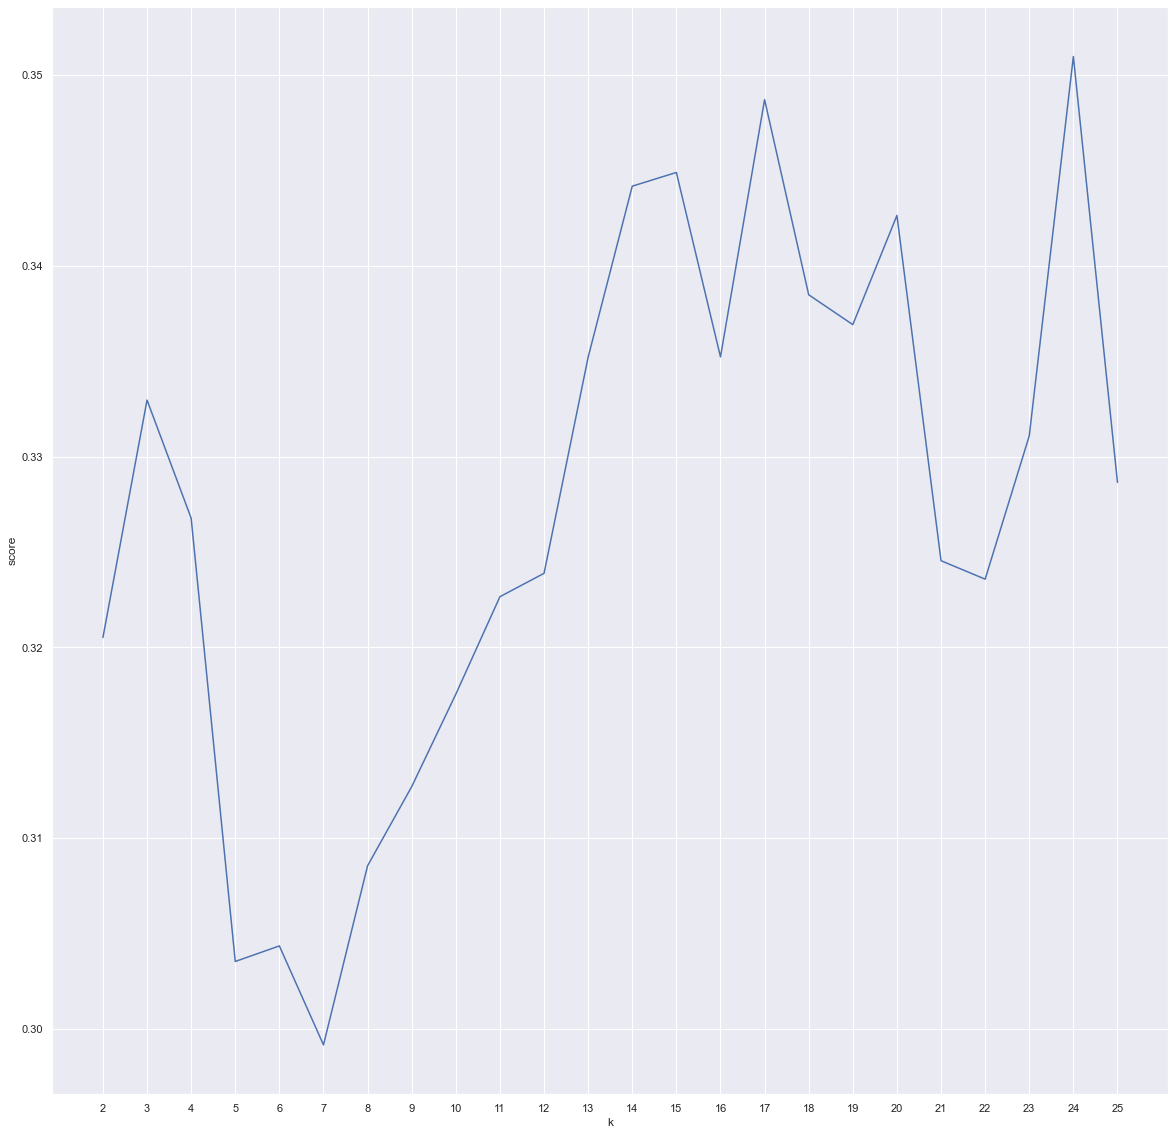

In [8]:
np.random.seed(42)
silhouette = []
k_clusters = []
clusters = []
kmax = 25

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  clustered_data = KMeans(n_clusters = k).fit(data)
  labels = clustered_data.labels_
  silhouette.append(silhouette_score(data, labels, metric = 'euclidean'))
  k_clusters.append(k)
  clusters.append(clustered_data)

sns.set(rc = {'figure.figsize': (20, 20)})
sns.lineplot(x=k_clusters, y=silhouette)
plt.xticks(k_clusters)
plt.xlabel('k')
plt.ylabel('score')

sil_series = pd.Series(silhouette)
print(sil_series[sil_series <= sil_series.min() + 0.05])

### Append labeled clusters to data

In [9]:
clusters[4]

KMeans(n_clusters=6)

In [10]:
data['cluster'] = clusters[4].labels_

In [11]:
clustered_dataset = pd.merge(averaged_df, data['cluster'], left_index=True, right_index=True)
clustered_dataset.head(10)

site_key  longitude_decimal_degrees  latitude_decimal_degrees  clay_tot_psa  \
0      687                    -123.73                     48.63           NaN   
1      689                    -123.52                     48.83           NaN   
2     1122                    -123.37                     48.48      7.166667   
3     1123                    -124.45                     48.60      8.200000   
4     2367                    -123.36                     48.88     10.500000   
5     2368                    -123.51                     48.74      6.000000   
6     2369                    -123.49                     48.84      3.750000   
7     2370                    -123.55                     48.83      4.666667   
8     2374                    -123.30                     48.81     25.800000   
9     2378                    -123.17                     48.78      8.250000   

   silt_tot_psa  sand_tot_psa          oc       oc_d  c_tot      n_tot  ...  \
0           NaN           NaN  125.850000  32.572500    NaN  12.900000  ...   
1           NaN           NaN  124.975000  35.565000    NaN  10.100000  ...   
2     30.500000     62.333333   65.142857  33.768571    NaN   5.142857  ...   
3     36.000000     55.800000  146.533333  66.251667    NaN   3.983333  ...   
4     36.000000     53.500000   13.000000  15.210000    NaN   0.800000  ...   
5     36.666667     57.333333   62.428571  24.738857    NaN   2.142857  ...   
6     16.750000     79.500000  117.200000  28.008000    NaN   2.000000  ...   
7     42.666667     52.666667   54.250000  16.025000    NaN   2.000000  ...   
8     43.200000     31.000000   87.833333  26.260000    NaN   1.800000  ...   
9     27.500000     64.250000   22.000000  23.585000    NaN   1.600000  ...   

   ecec       wpg2     db_od       ca_ext      mg_ext     na_ext       k_ext  \
0   NaN  24.000000  0.970000  3336.666667  336.380000  23.766667  370.146667   
1   NaN  15.000000  1.032500  3092.666667  383.570000  24.533333  458.773333   
2   NaN   4.285714  1.108571  2144.571429  386.681429  66.371429  524.498571   
3   NaN   4.166667  1.055000   788.666667  270.233333  43.700000  303.025000   
4   NaN   3.750000  1.386667  1210.000000  189.566667  38.333333   97.750000   
5   NaN  33.571429  1.191429  1726.666667   52.433333  19.166667   91.233333   
6   NaN  31.600000  1.116000  1050.000000   87.725000   5.750000   68.425000   
7   NaN  18.750000  0.995000   273.333333   20.166667  15.333333   39.100000   
8   NaN   1.583333  1.236667  2436.000000  559.020000  55.200000   39.100000   
9   NaN  21.250000  1.460000  1730.000000  356.950000  46.000000  146.625000   

   ec_satp  ec_12pre  cluster  
0      NaN       NaN        5  
1      NaN       NaN        1  
2      NaN       NaN        0  
3      NaN       NaN        4  
4      NaN       NaN        4  
5      NaN       NaN        0  
6      NaN       NaN        0  
7      NaN       NaN        0  
8      NaN       NaN        4  
9      NaN       NaN        0  

[10 rows x 25 columns]

### export data to CSV

In [12]:
clustered_dataset = clustered_dataset.fillna(0.0)

In [13]:
clustered_dataset.to_csv('./data/processed/soil_properties/soil_properties_dataset.csv')

In [14]:
clustered_dataset.size

47650

In [15]:
clustered_dataset[clustered_dataset['cluster'] == 0]

site_key  longitude_decimal_degrees  \
2                     1122                -123.370000   
5                     2368                -123.510000   
6                     2369                -123.490000   
7                     2370                -123.550000   
9                     2378                -123.170000   
...                    ...                        ...   
1730    NEON_WREF_initSoil                -121.990796   
1731               NEON_NA                -122.329672   
1732  NutNet_American Camp                -123.014311   
1736  NutNet_Smith Prairie                -122.624754   
1902                US0242                -118.966670   

      latitude_decimal_degrees  clay_tot_psa  silt_tot_psa  sand_tot_psa  \
2                    48.480000      7.166667     30.500000     62.333333   
5                    48.740000      6.000000     36.666667     57.333333   
6                    48.840000      3.750000     16.750000     79.500000   
7                    48.830000      4.666667     42.666667     52.666667   
9                    48.780000      8.250000     27.500000     64.250000   
...                        ...           ...           ...           ...   
1730                 45.811294     11.871795     35.412821     52.715385   
1731                 45.762378     22.264286     32.478571     45.257143   
1732                 48.465041      8.233333     15.933333     75.733333   
1736                 48.206581      7.200000     15.100000     77.600000   
1902                 48.333330      2.500000     38.500000     59.000000   

              oc       oc_d  c_tot     n_tot  ...      ecec       wpg2  \
2      65.142857  33.768571    0.0  5.142857  ...  0.000000   4.285714   
5      62.428571  24.738857    0.0  2.142857  ...  0.000000  33.571429   
6     117.200000  28.008000    0.0  2.000000  ...  0.000000  31.600000   
7      54.250000  16.025000    0.0  2.000000  ...  0.000000  18.750000   
9      22.000000  23.585000    0.0  1.600000  ...  0.000000  21.250000   
...          ...        ...    ...       ...  ...       ...        ...   
1730  124.750000  11.418000    0.0  3.069231  ...  0.000000  14.319615   
1731   91.687500  15.075812    0.0  3.056250  ...  9.772727  10.625000   
1732   73.072333   0.000000    0.0  4.841333  ...  0.000000   0.000000   
1736   72.322000  38.826667    0.0  5.430667  ...  0.000000   0.000000   
1902   12.066667  11.078200    0.0  1.300000  ...  0.000000  18.800000   

         db_od       ca_ext      mg_ext     na_ext       k_ext  ec_satp  \
2     1.108571  2144.571429  386.681429  66.371429  524.498571      0.0   
5     1.191429  1726.666667   52.433333  19.166667   91.233333      0.0   
6     1.116000  1050.000000   87.725000   5.750000   68.425000      0.0   
7     0.995000   273.333333   20.166667  15.333333   39.100000      0.0   
9     1.460000  1730.000000  356.950000  46.000000  146.625000      0.0   
...        ...          ...         ...        ...         ...      ...   
1730  0.912667     0.000000    0.000000   0.000000    0.000000      0.0   
1731  0.731731     0.000000    0.000000   0.000000    0.000000      0.0   
1732  0.000000     0.000000    0.000000   0.000000    0.000000      0.0   
1736  0.537782     0.000000    0.000000   0.000000    0.000000      0.0   
1902  1.210000   823.333333   64.533333  61.333333  117.240000      0.1   

      ec_12pre  cluster  
2          0.0        0  
5          0.0        0  
6          0.0        0  
7          0.0        0  
9          0.0        0  
...        ...      ...  
1730       0.0        0  
1731       0.0        0  
1732       0.0        0  
1736       0.0        0  
1902       0.0        0  

[343 rows x 25 columns]

In [16]:
clustered_dataset[clustered_dataset['cluster'] == 2]

site_key  longitude_decimal_degrees  latitude_decimal_degrees  \
10       2379                -123.670000                 49.000000   
314       208                -117.071945                 45.537224   
331       779                -123.044167                 45.107498   
332       791                -117.468056                 45.572224   
346       794                -117.423614                 45.580002   
...       ...                        ...                       ...   
1900   US0018                -123.061110                 48.560830   
1901   US0241                -118.550000                 48.383330   
1903   US0257                -123.447220                 45.913890   
1904   US0284                -117.554170                 46.953890   
1905   US0366                -123.098610                 45.534720   

      clay_tot_psa  silt_tot_psa  sand_tot_psa          oc       oc_d  c_tot  \
10       35.500000     53.000000     11.500000   50.571429  18.057143    0.0   
314      39.616667     48.666667     11.716667   13.183333  17.484000    0.0   
331      18.100000     51.360001     30.540000    8.360000  12.472000    0.0   
332      25.016667     59.599999     15.383334   10.516667  16.880000    0.0   
346      19.750000     66.050001     14.200000   17.325000  15.810000    0.0   
...            ...           ...           ...         ...        ...    ...   
1900     17.666667     54.166667     28.166667  106.133333  75.240000    0.0   
1901      2.500000     55.000000     42.500000   12.850000  11.305000    0.0   
1903     22.200000     59.400000     18.400000   18.400000  17.853333    0.0   
1904     17.222222     76.555556      6.222222    9.744444  12.102222    0.0   
1905     20.857143     72.000000      7.142857   14.685714   6.368000    0.0   

         n_tot  ...  ecec       wpg2     db_od       ca_ext       mg_ext  \
10    2.200000  ...   0.0   2.500000  1.300000  2380.000000   766.333333   
314   1.565000  ...   0.0   5.166667  1.452000  5566.666667  1400.000000   
331   0.940000  ...   0.0   0.000000  1.450000  3488.000000   786.600000   
332   1.167500  ...   0.0   0.500000  1.303333  4370.000000   906.333333   
346   1.462500  ...   0.0  15.250000  1.117500  2945.000000   783.250000   
...        ...  ...   ...        ...       ...          ...          ...   
1900  7.971667  ...   0.0   1.000000  0.785000  7086.666667   635.500000   
1901  0.700000  ...   0.0  10.000000  0.920000   860.000000    78.650000   
1903  2.050000  ...   0.0  11.000000  1.356667   740.000000   241.940000   
1904  0.925000  ...   0.0   0.000000  1.334444  4126.666667   524.111111   
1905  0.000000  ...   0.0   0.000000  1.456000  2562.857143   318.000000   

          na_ext       k_ext   ec_satp  ec_12pre  cluster  
10     57.500000  110.783333  0.000000       0.0        2  
314   498.333333  306.500000  0.280000       0.0        2  
331   105.800000  132.920000  0.000000       0.0        2  
332   617.000000  208.566667  0.328333       0.0        2  
346    63.250000  606.000000  0.000000       0.0        2  
...          ...         ...       ...       ...      ...  
1900   92.000000  123.733333  0.000000       0.0        2  
1901   23.000000  215.500000  0.100000       0.0        2  
1903    0.000000  273.800000  0.100000       0.0        2  
1904   27.600000  260.622222  0.100000       0.0        2  
1905   49.285714  296.285714  0.100000       0.0        2  

[272 rows x 25 columns]

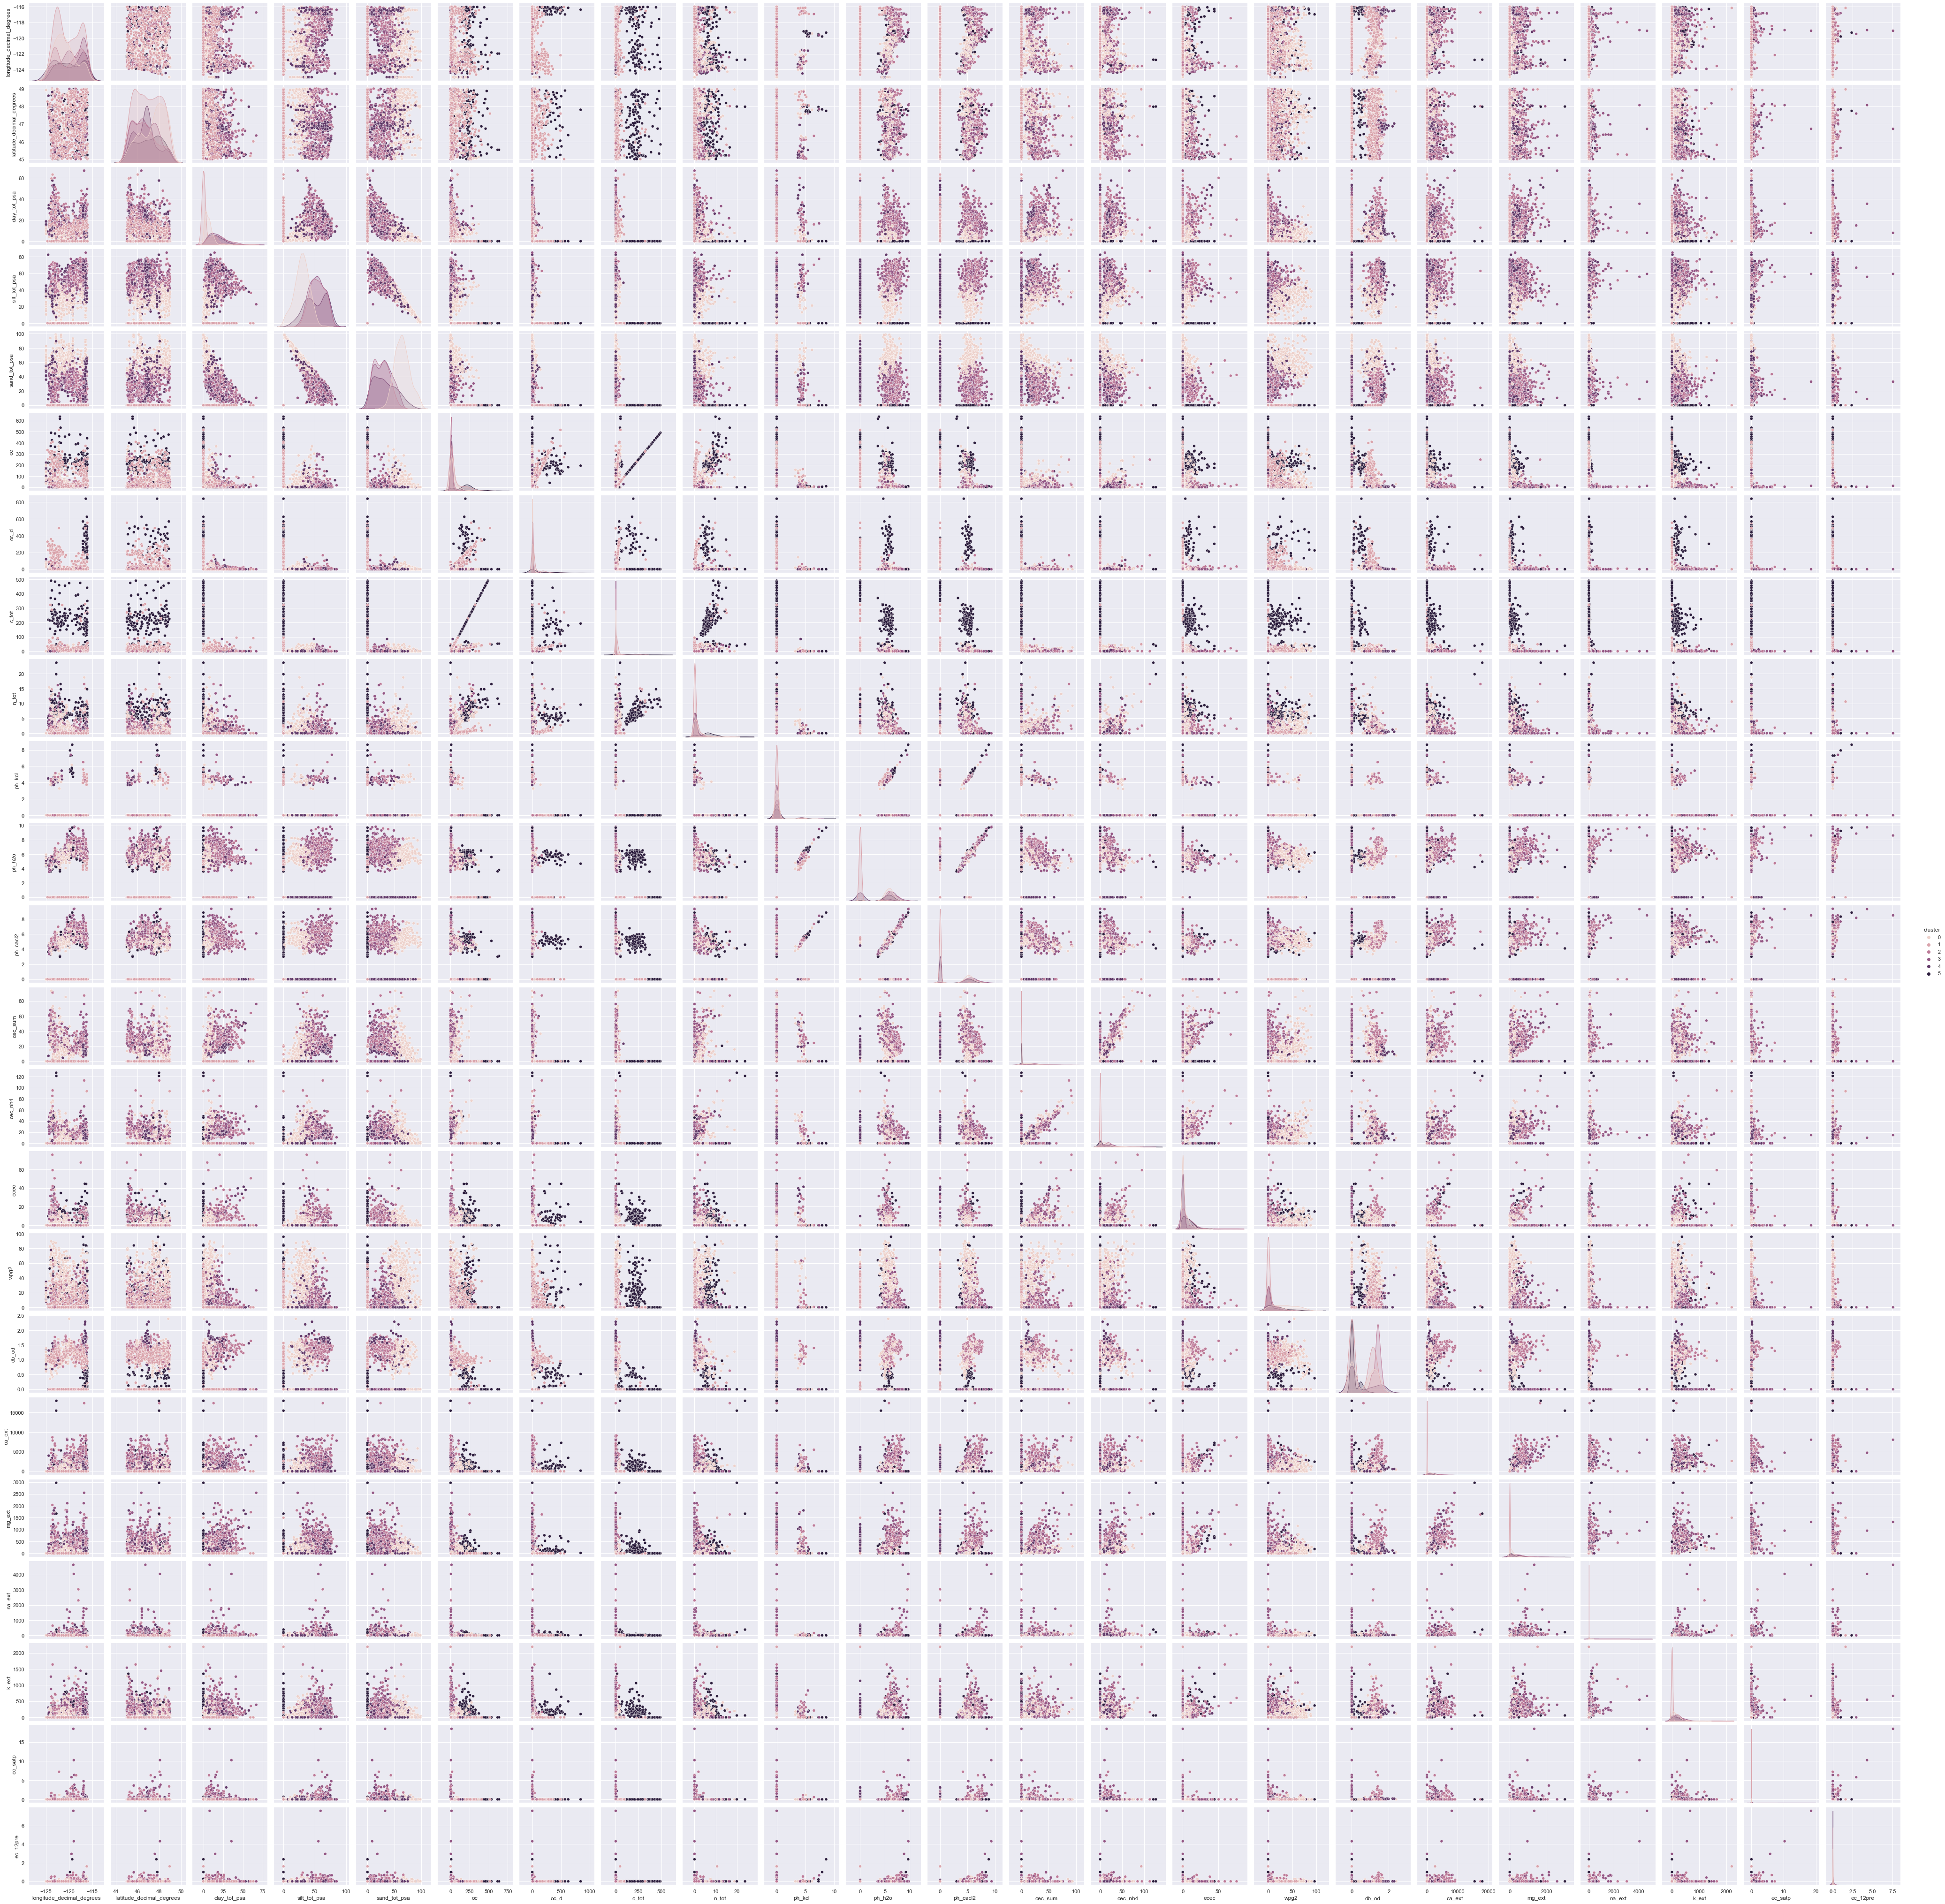

In [17]:
pairplot = sns.pairplot(clustered_dataset, hue='cluster')
pairplot.savefig('soil_pairplot_clustered(without_ca).png')